<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
# Standard pip install for required packages
!pip install numpy pandas seaborn --quiet

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
# Standard pandas read_csv from URL
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
df = pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


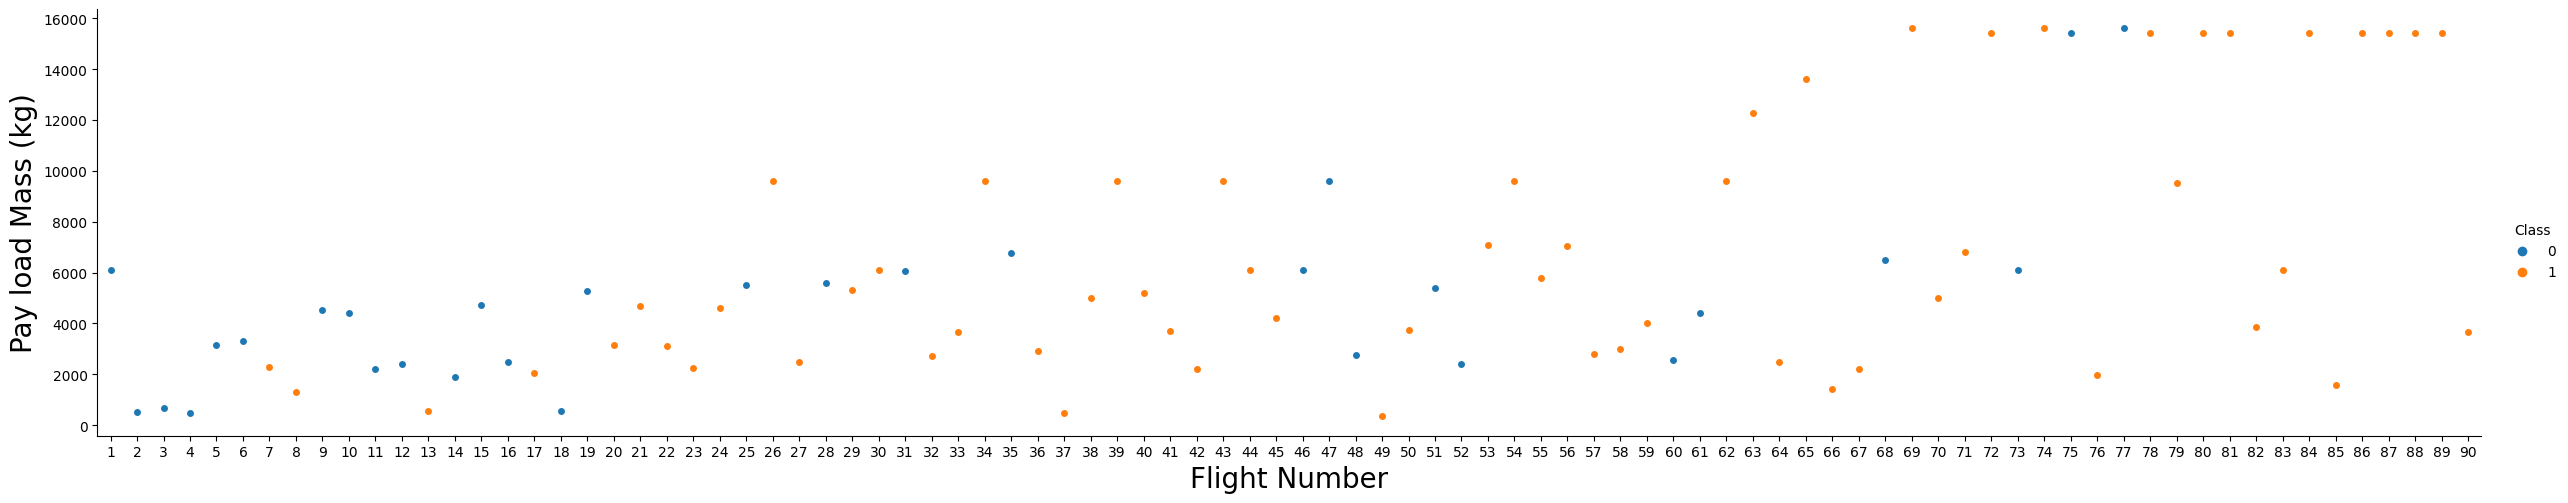

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


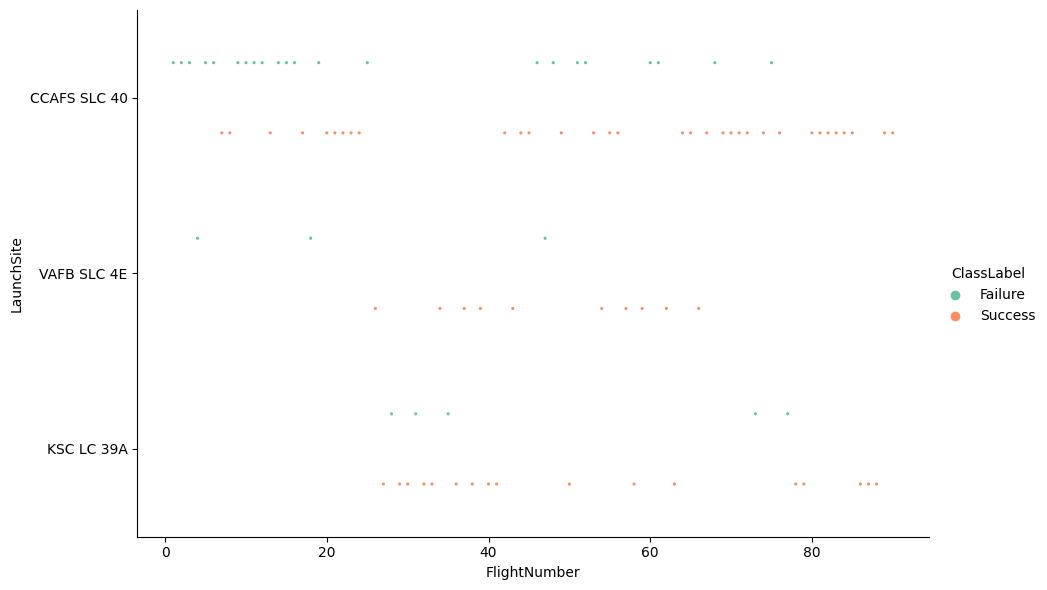

In [5]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

df["ClassLabel"] = df["Class"].map({0: "Failure", 1: "Success"})
g = sns.catplot(
    data=df, x="FlightNumber", y="LaunchSite", hue="ClassLabel",
    kind="swarm", dodge=True, height=6, aspect=1.6, s=5, palette="Set2"
)



Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


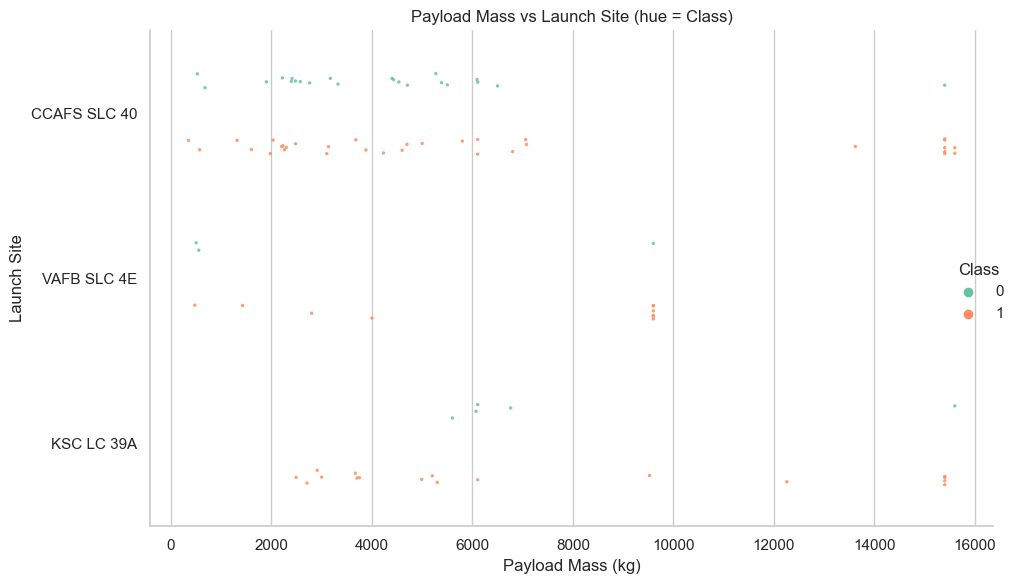

In [6]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

g = sns.catplot(
    data=df,
    x="PayloadMass",
    y="LaunchSite",
    hue="Class",
    kind="strip",
    dodge=True,
    jitter=True,
    height=6,
    aspect=1.6,
    s=6,
    alpha=0.85,
    palette="Set2"
)

g.set_axis_labels("Payload Mass (kg)", "Launch Site")
plt.title("Payload Mass vs Launch Site (hue = Class)")
plt.tight_layout()


Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


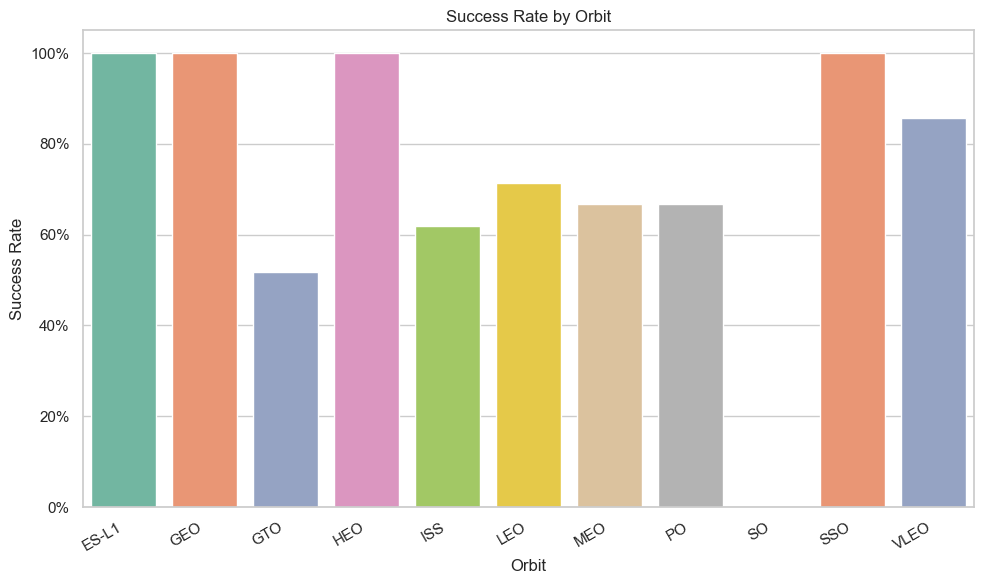

In [7]:

# Compute success rate per orbit
orbit_success = (
    df.groupby("Orbit", as_index=False)["Class"]
      .mean()
      .rename(columns={"Class": "SuccessRate"})
)

# Plot bar chart
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=orbit_success, x="Orbit", y="SuccessRate", palette="Set2")

plt.xlabel("Orbit")
plt.ylabel("Success Rate")
plt.title("Success Rate by Orbit")
plt.xticks(rotation=30, ha="right")

## Format y-axis as percentages
ax.yaxis.set_major_formatter(lambda y, _: f"{y:.0%}")

plt.tight_layout()


Analyze the plotted bar chart to identify which orbits have the highest success rates.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


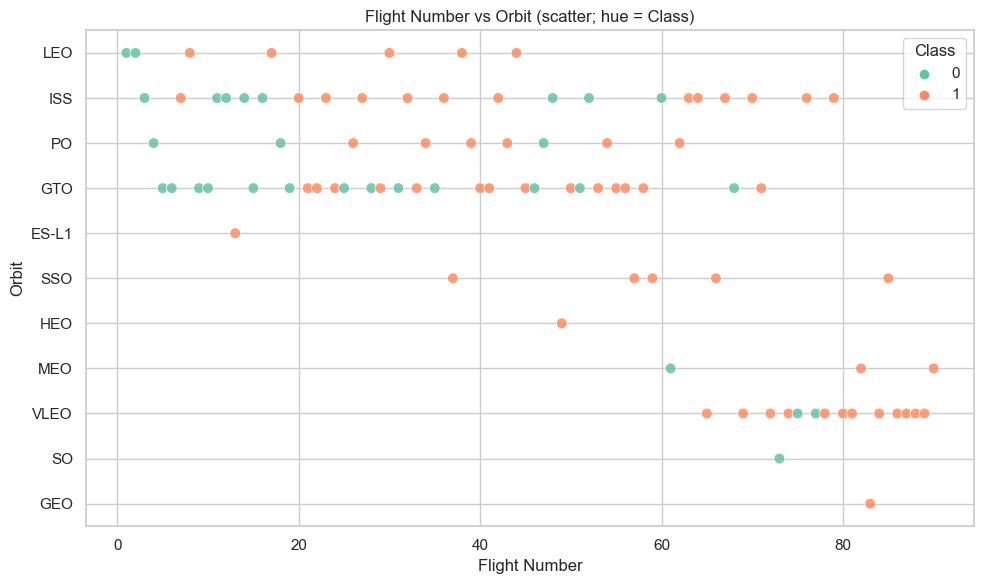

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
       x="FlightNumber",
    y="Orbit",
    hue="Class",       # capital C based on your columns
    palette="Set2",
    s=60,              # point size
    alpha=0.85         # slight transparency helps with overlap
)

plt.xlabel("Flight Number")
plt.ylabel("Orbit")
plt.title("Flight Number vs Orbit (scatter; hue = Class)")
plt.tight_layout()
plt.show()


You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


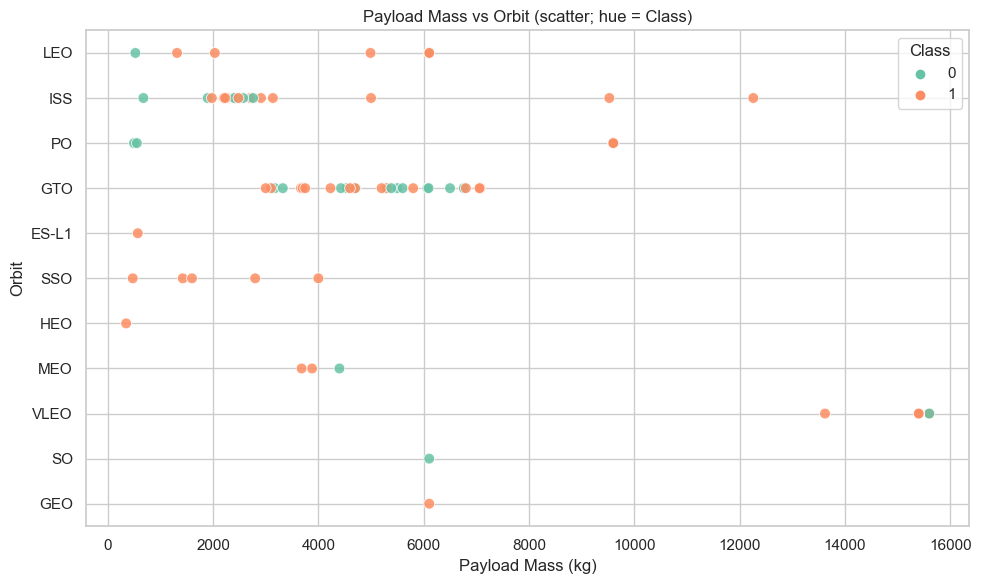

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Create the figure (correct call)
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
       x="PayloadMass",
    y="Orbit",
    hue="Class",       # capital C based on your columns
    palette="Set2",
    s=60,
    alpha=0.85
)

plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit")
plt.title("Payload Mass vs Orbit (scatter; hue = Class)")
plt.tight_layout()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [10]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,ClassLabel
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,Failure
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,Failure
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,Failure
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,Failure
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,Failure


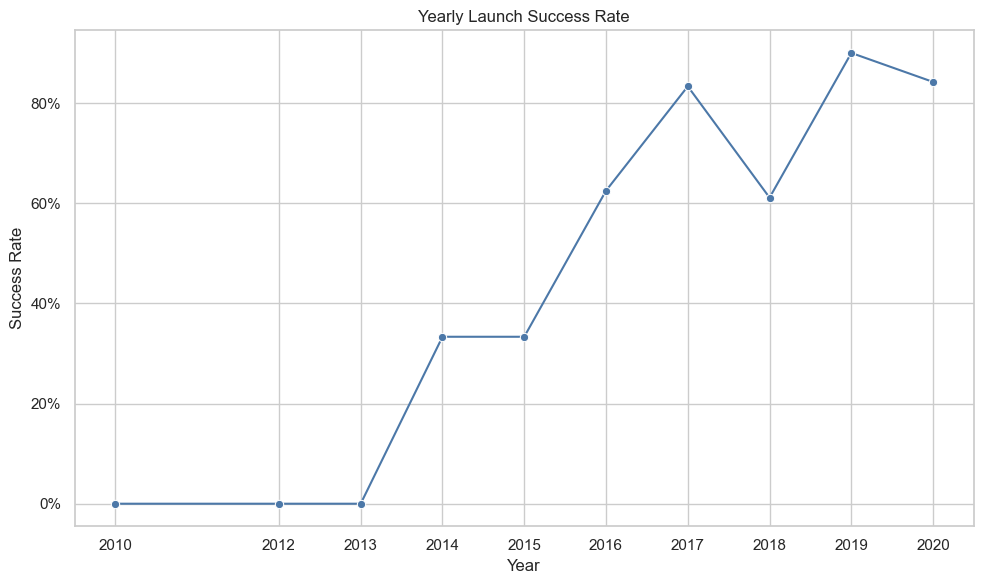

In [11]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Parse the Date column and extract Year (do NOT overwrite Date)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year

# 2) Compute success rate per year
yearly_success = (
    df.groupby("Year", as_index=False)["Class"]
      .mean()
      .rename(columns={"Class": "SuccessRate"})
      .sort_values("Year")
)

# 3) Plot line chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=yearly_success,
    x="Year",
    y="SuccessRate",
    marker="o",
    color="#4C78A8"
)

# Labels and formatting
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.title("Yearly Launch Success Rate")
plt.gca().yaxis.set_major_formatter(lambda y, _: f"{y:.0%}")  # show asplt.gca().yaxis.set_major_formatter(lambda y, _: f"{y:.0%}")  # show as %
plt.xticks(yearly_success["Year"].unique(), rotation=0)
plt.tight_layout()


you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
#features.head()
unique_sites = df['LaunchSite'].unique()
#print(unique_sites)
cca_records = df[df['LaunchSite'].str.startswith('CCA')].head(5)
print(cca_records)
# Total payload for all launches (since no customer column is present)
total_payload = df['PayloadMass'].sum()
print(f"Total payload carried by all boosters: {total_payload} kg")

   FlightNumber       Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1 2010-01-01       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2 2012-01-01       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3 2013-01-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
4             5 2013-01-01       Falcon 9  3170.000000   GTO  CCAFS SLC 40   
5             6 2014-01-01       Falcon 9  3325.000000   GTO  CCAFS SLC 40   

     Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  ReusedCount  \
0  None None        1     False   False  False        NaN    1.0            0   
1  None None        1     False   False  False        NaN    1.0            0   
2  None None        1     False   False  False        NaN    1.0            0   
4  None None        1     False   False  False        NaN    1.0            0   
5  None None        1     False   False  False        NaN    1.0            0   

  Serial  Longitude   Latitude  Class ClassL

### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [13]:
# HINT: Use get_dummies() function on the categorical columns

import pandas as pd

# If your features dataframe is named `features`, continue below.
# If not, set it explicitly, e.g.:
# features = df.copy()

# Target columns to one-hot encode (handle "Orbits" vs "Orbit" typo)
requested_cats = ["Orbits", "LaunchSite", "LandingPad", "Serial"]
actual_cols = features.columns

# Map the requested names to actual column names
name_map = {}
for col in requested_cats:
    if col in actual_cols:
        name_map[col] = col
    elif col == "Orbits" and "Orbit" in actual_cols:
        name_map[col] = "Orbit"
    else:
        # If a requested column is missing, skip it (or raise an error if you prefer)
        pass

# Final list of categorical columns to encode that actually exist
categorical_cols = list({v for v in name_map.values()})

# One-hot encode while keeping all other columns
features_one_hot = pd.get_dummies(
    features,
    columns=categorical_cols,
    drop_first=False,   # keep all categories
    dtype="int8"        # compact dtype for    dtype="int8"        # compact dtype for dummy columns
)

# Show the result


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [14]:
# HINT: use astype function

# Convert all columns in features_one_hot to float64
features_one_hot = features_one_hot.astype('float64')

# Display the first few rows
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [15]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>


In [16]:
# Calculate the average payload mass for booster version 'Falcon 9'
avg_payload_falcon9 = df[df['BoosterVersion'] == 'Falcon 9']['PayloadMass'].mean()
print(f"Average payload mass for Falcon 9 boosters: {avg_payload_falcon9} kg")

Average payload mass for Falcon 9 boosters: 6104.959411764707 kg


In [17]:
# List all unique booster versions
booster_versions = df['BoosterVersion'].unique()
print("All booster versions:", booster_versions)

All booster versions: ['Falcon 9']


In [18]:
# Find the first successful landing with a non-blank LandingPad
first_success_landing = df[(df['LandingPad'].notna()) & (df['LandingPad'] != '') & (df['Class'] == 1)].sort_values('Date').head(1)
print("First successful landing with a non-blank LandingPad:")
print(first_success_landing[['Date', 'LandingPad', 'BoosterVersion', 'Outcome']])

First successful landing with a non-blank LandingPad:
         Date                LandingPad BoosterVersion    Outcome
16 2015-01-01  5e9e3032383ecb267a34e7c7       Falcon 9  True RTLS


In [19]:
# List booster names with successful drone ship landings and payload mass between 4000 and 6000 kg
filtered_boosters = df[(df['Outcome'] == 'True ASDS') & (df['PayloadMass'] > 4000) & (df['PayloadMass'] < 6000)]
booster_names = filtered_boosters['BoosterVersion'].unique()
print("Booster versions with successful drone ship landings and payload mass between 4000 and 6000 kg:")
print(booster_names)

Booster versions with successful drone ship landings and payload mass between 4000 and 6000 kg:
['Falcon 9']


In [20]:
# Calculate the total number of successful and failure mission outcomes
success_count = df[df['Class'] == 1].shape[0]
failure_count = df[df['Class'] == 0].shape[0]
print(f"Total successful missions: {success_count}")
print(f"Total failed missions: {failure_count}")

Total successful missions: 60
Total failed missions: 30


In [21]:
# List the names of the booster(s) which have carried the maximum payload mass
max_payload = df['PayloadMass'].max()
max_payload_boosters = df[df['PayloadMass'] == max_payload]['BoosterVersion'].unique()
print(f"Booster version(s) with the maximum payload mass ({max_payload} kg):")
print(max_payload_boosters)

Booster version(s) with the maximum payload mass (15600.0 kg):
['Falcon 9']


In [22]:
# List failed landing outcomes on drone ship in 2015, with booster versions and launch site names
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
failures_2015 = df[(df['Outcome'].str.contains('ASDS', na=False)) & (df['Class'] == 0) & (df['Date'].dt.year == 2015)]
result = failures_2015[['Outcome', 'BoosterVersion', 'LaunchSite']]
print("Failed drone ship landings in 2015 (Outcome, BoosterVersion, LaunchSite):")
print(result)

Failed drone ship landings in 2015 (Outcome, BoosterVersion, LaunchSite):
       Outcome BoosterVersion    LaunchSite
11  False ASDS       Falcon 9  CCAFS SLC 40
13  False ASDS       Falcon 9  CCAFS SLC 40
15   None ASDS       Falcon 9  CCAFS SLC 40


In [23]:
# Rank the count of landing outcomes between 2010-06-04 and 2017-03-20, in descending order
start_date = '2010-06-04'
end_date = '2017-03-20'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
outcome_counts = df.loc[mask, 'Outcome'].value_counts().sort_values(ascending=False)
print("Landing outcome counts (2010-06-04 to 2017-03-20), ranked descending:")
print(outcome_counts)

Landing outcome counts (2010-06-04 to 2017-03-20), ranked descending:
True ASDS      12
None None      10
True RTLS       8
True Ocean      4
False ASDS      4
False Ocean     2
None ASDS       2
Name: Outcome, dtype: int64
